## Image Alteration Detection using Pretrained CNN (ResNet50)

#### Import libraries

In [18]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing import image

#### Defining required parameters

In [12]:
# Parameters
IMG_SIZE = (128, 128)  # Smaller input for faster training
BATCH_SIZE = 16
EPOCHS = 10  # increase this for better results

# Paths
train_dir = 'dataset/train'
test_dir = 'dataset/test_mixed'

#### Generating data

In [13]:
# Data Generator
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                               validation_split=0.2)

train_data = train_gen.flow_from_directory(train_dir,
                                           target_size=IMG_SIZE,
                                           batch_size=BATCH_SIZE,
                                           class_mode='binary',
                                           subset='training')

val_data = train_gen.flow_from_directory(train_dir,
                                         target_size=IMG_SIZE,
                                         batch_size=BATCH_SIZE,
                                         class_mode='binary',
                                         subset='validation')

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


#### Creating model with ResNet50

In [14]:
# Load weights from local path
local_weights_file = os.path.abspath("resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5")

base_model = ResNet50(weights=local_weights_file, include_top=False, input_shape=(128, 128, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

# Freeze base model
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### Training model

In [15]:
# Train
history = model.fit(train_data, validation_data=val_data, epochs=EPOCHS)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 94s 826ms/step - accuracy: 0.5565 - loss: 0.7155 - val_accuracy: 0.6625 - val_loss: 0.5978
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 68s 678ms/step - accuracy: 0.7204 - loss: 0.5443 - val_accuracy: 0.6975 - val_loss: 0.5716
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 67s 666ms/step - accuracy: 0.7429 - loss: 0.5169 - val_accuracy: 0.7050 - val_loss: 0.5692
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 67s 668ms/step - accuracy: 0.7788 - loss: 0.4640 - val_accuracy: 0.7100 - val_loss: 0.5533
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 78s 779ms/step - accuracy: 0.8263 - loss: 0.4180 - val_accuracy: 0.7025 - val_loss: 0.5412
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 77s 767ms/step - accuracy: 0.8051 - loss: 0.4053 - val_accuracy: 0.7325 - val_loss: 0.5407
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 79s 791ms/step - accuracy: 0.8756 - loss: 0.3642 - val_accuracy: 0.7175 - val_loss: 0.5360
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 69s 687ms/step - accuracy: 0.8622 - loss: 0

#### Plot Training Curves

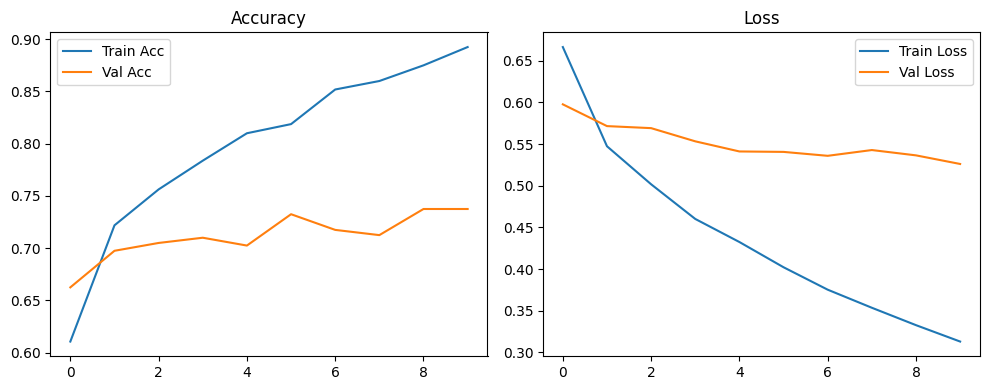

In [16]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")

plt.tight_layout()
plt.show()

#### Predicting model

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


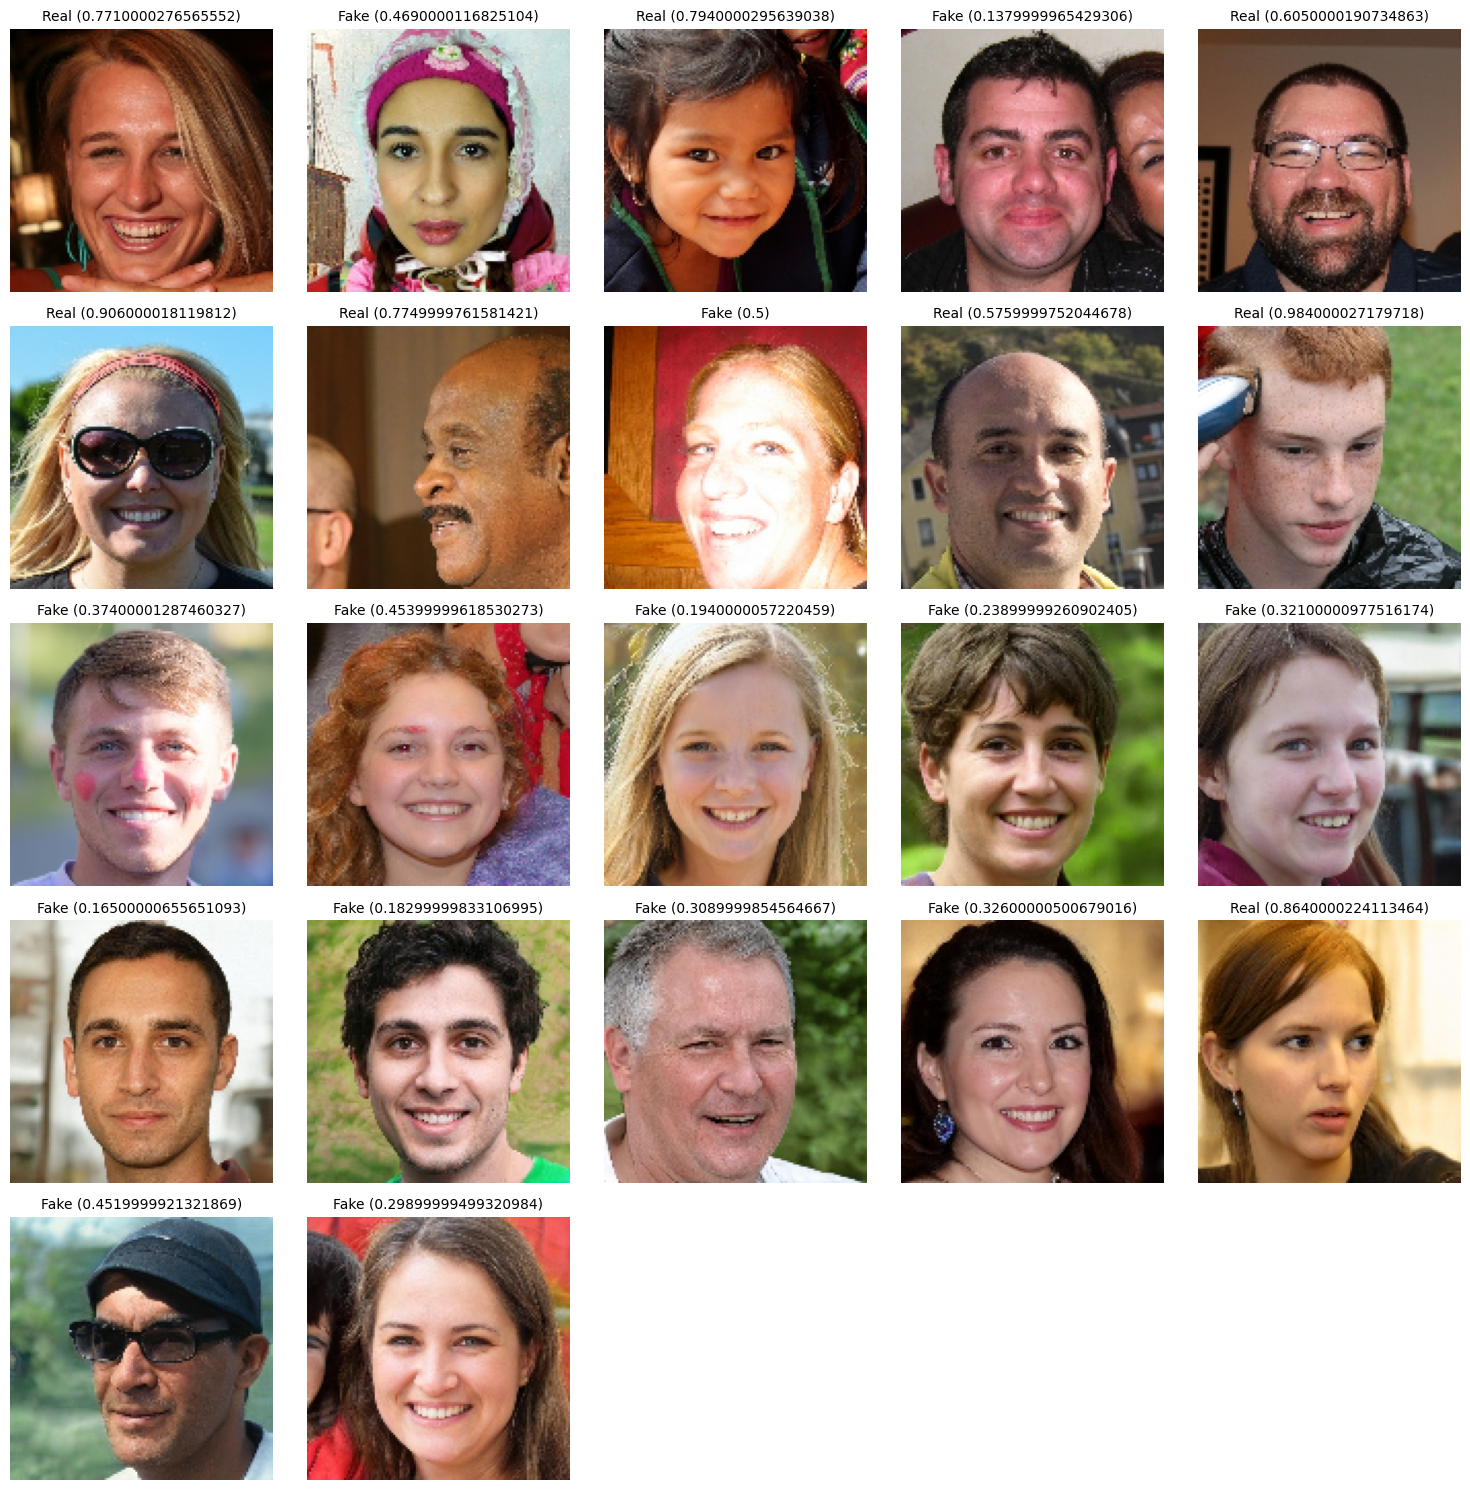

In [19]:
test_images = sorted(os.listdir(test_dir))

results = []

plt.figure(figsize=(15, 15))

for i, img_name in enumerate(test_images[:25]):  # show first 25
    img_path = os.path.join(test_dir, img_name)
    
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    pred = model.predict(img_array)[0][0]
    label = "Real" if pred >= 0.5 else "Fake"
    confidence = round(pred, 3)

    results.append({"filename": img_name, "prediction": label, "confidence": confidence})

    plt.subplot(5, 5, i + 1)
    plt.imshow(img)
    plt.title(f"{label} ({confidence})", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

#### Showing the result

In [20]:
# Predict on mixed test folder
def predict_mixed_folder(test_dir):
    predictions = []
    files = os.listdir(test_dir)
    for fname in files:
        img_path = os.path.join(test_dir, fname)
        img = load_img(img_path, target_size=IMG_SIZE)
        img_array = img_to_array(img)
        img_array = preprocess_input(img_array)
        img_array = np.expand_dims(img_array, axis=0)

        prob = model.predict(img_array)[0][0]
        label = 'Real' if prob > 0.5 else 'Fake'
        predictions.append((fname, label, prob))

    return predictions
    
# Run and show results
results = predict_mixed_folder(test_dir)
for fname, label, prob in results:
    print(f"{fname}: {label} ({prob:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
00001.jpg: Real (0.77)
00004.jpg: Fake (0.47)
00007.jpg: Real (0.79)
00016.jpg: Fake (0.14)
00023.jpg: Real (0.61)
00025.jpg: Real (0.91)
0002